# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

WHO: The audience I am communicating to consists of my classmates, LFs, and instructors.

WHAT: I want my audience to be able to make clear and useful insights from my data. I want to show them trends within the VFX and Animation industry that will spark curiousity and deepen the knowledge of the end-users. 

HOW: Using my three datasets (Animated Movies, NVDA, and 30kMovies), I will create visualizations that drive conversation and reveal meaningful trends for both myself and the audience.

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [18]:
movies_30k = pd.read_csv("movies_30k.csv")
ani_movies = pd.read_csv("Animation Movies.csv")
nvda = pd.read_csv("NVDA.csv")

In [14]:
## 30k MOVIES DATA SET

print("=== 30k Movies: info() ===")
movies_30k.info()

print("\n=== 30k Movies: describe() ===")
print(movies_30k.describe(include='all'))

=== 30k Movies: info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     33600 non-null  object 
 1   Title                  33600 non-null  object 
 2   Movie Link             33600 non-null  object 
 3   Year                   33600 non-null  int64  
 4   Duration               33379 non-null  object 
 5   MPA                    25624 non-null  object 
 6   Rating                 33462 non-null  float64
 7   Votes                  33462 non-null  object 
 8   budget                 11815 non-null  float64
 9   grossWorldWide         18222 non-null  float64
 10  gross_US_Canada        17571 non-null  float64
 11  opening_weekend_Gross  15523 non-null  float64
 12  directors              33241 non-null  object 
 13  writers                32024 non-null  object 
 14  stars                  3312

In [21]:
## ANIMATION MOVIES DATA SET

print("=== ani_movies: info() ===")
ani_movies.info()

print("\n=== ani_movies: describe() ===")
print(ani_movies.describe(include='all'))

=== ani_movies: info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    51945 non-null  int64  
 1   title                 51944 non-null  object 
 2   vote_average          51945 non-null  float64
 3   vote_count            51945 non-null  int64  
 4   status                51945 non-null  object 
 5   release_date          49808 non-null  object 
 6   revenue               51945 non-null  int64  
 7   runtime               51945 non-null  int64  
 8   adult                 51945 non-null  bool   
 9   backdrop_path         15835 non-null  object 
 10  budget                51945 non-null  int64  
 11  homepage              8252 non-null   object 
 12  imdb_id               29552 non-null  object 
 13  original_language     51945 non-null  object 
 14  original_title        51944 non-null  objec

In [23]:
## NVDA DATA SET

print("=== NVDA: info() ===")
nvda.info()

print("\n=== NVDA: describe() ===")
print(nvda.describe(include='all'))

=== NVDA: info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6116 entries, 0 to 6115
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6116 non-null   object 
 1   Open       6116 non-null   float64
 2   High       6116 non-null   float64
 3   Low        6116 non-null   float64
 4   Close      6116 non-null   float64
 5   Adj Close  6116 non-null   float64
 6   Volume     6116 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 334.6+ KB

=== NVDA: describe() ===
              Date         Open         High          Low        Close  \
count         6116  6116.000000  6116.000000  6116.000000  6116.000000   
unique        6116          NaN          NaN          NaN          NaN   
top     2000-01-03          NaN          NaN          NaN          NaN   
freq             1          NaN          NaN          NaN          NaN   
mean           NaN    53.052266    54.017201    52.03

In [ ]:
## FIND NULLS

print("30k Movies - Nulls:\n", movies_30k.isnull().sum())
print("\nAnimation Movies - Nulls:\n", ani_movies.isnull().sum())
print("\nNVDA - Nulls:\n", nvda.isnull().sum())

30k Movies - Nulls:
 id                           0
Title                        0
Movie Link                   0
Year                         0
Duration                   221
MPA                       7976
Rating                     138
Votes                      138
budget                   21785
grossWorldWide           15378
gross_US_Canada          16029
opening_weekend_Gross    18077
directors                  359
writers                   1576
stars                      473
genres                     382
countries_origin           366
filming_locations         6729
production_companies      1378
Languages                  474
wins                         0
nominations                  0
oscars                       0
dtype: int64

Animation Movies - Nulls:
 id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime        

In [26]:
## CHECK FOR DUPLICATES

print("30k Movies - Duplicates:", movies_30k.duplicated().sum())
print("Animation Movies - Duplicates:", ani_movies.duplicated().sum())
print("NVDA - Duplicates:", nvda.duplicated().sum())

30k Movies - Duplicates: 0
Animation Movies - Duplicates: 0
NVDA - Duplicates: 0


In [28]:
## CONVERT GENRES TO ONE HOT

# For 30k Movies
genres_dummies_30k = movies_30k["genres"].str.get_dummies(sep=', ')
movies_30k_encoded = movies_30k.join(genres_dummies_30k)

# For Animation Movies
genres_dummies_ani = ani_movies["genres"].str.get_dummies(sep=', ')
ani_movies_encoded = ani_movies.join(genres_dummies_ani)

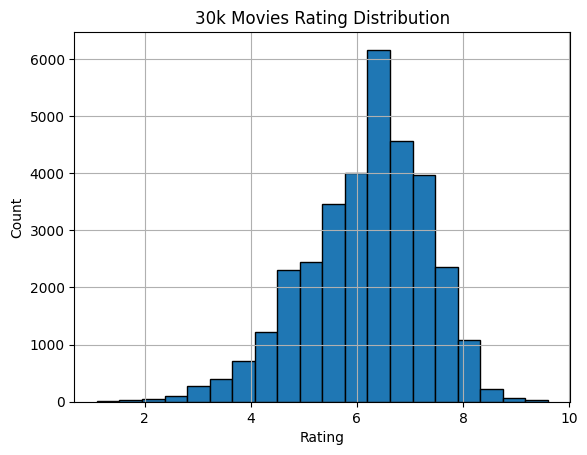

In [30]:
## RATING DISTRIBUTION FOR 30K MOVIES

import matplotlib.pyplot as plt

plt.hist(movies_30k["Rating"].dropna(), bins=20, edgecolor='black')
plt.title("30k Movies Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(True)
plt.show()

^ The above chart shows a histogram of ratings for all movies in the 30k movies data set (this excludes 0s and blanks).

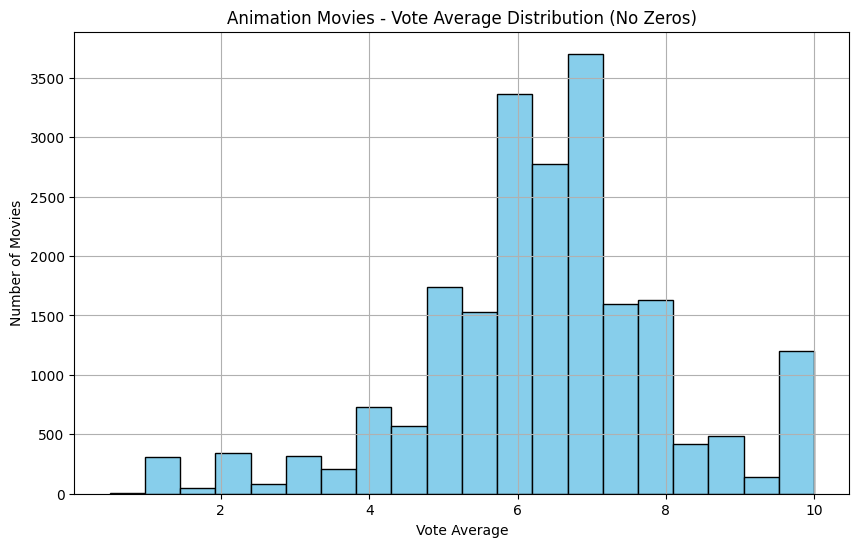

In [33]:
## RATING DISTRIBUTION FOR ANIMATION MOVIES (NO ZEROS)

import matplotlib.pyplot as plt

# Filter out 0s
filtered_votes = ani_movies[ani_movies["vote_average"] > 0]["vote_average"]

# Plot
plt.figure(figsize=(10, 6))
plt.hist(filtered_votes, bins=20, edgecolor='black', color='skyblue')
plt.title("Animation Movies - Vote Average Distribution (No Zeros)")
plt.xlabel("Vote Average")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

^ The above chart shows a histogram of ratings for animated movies.

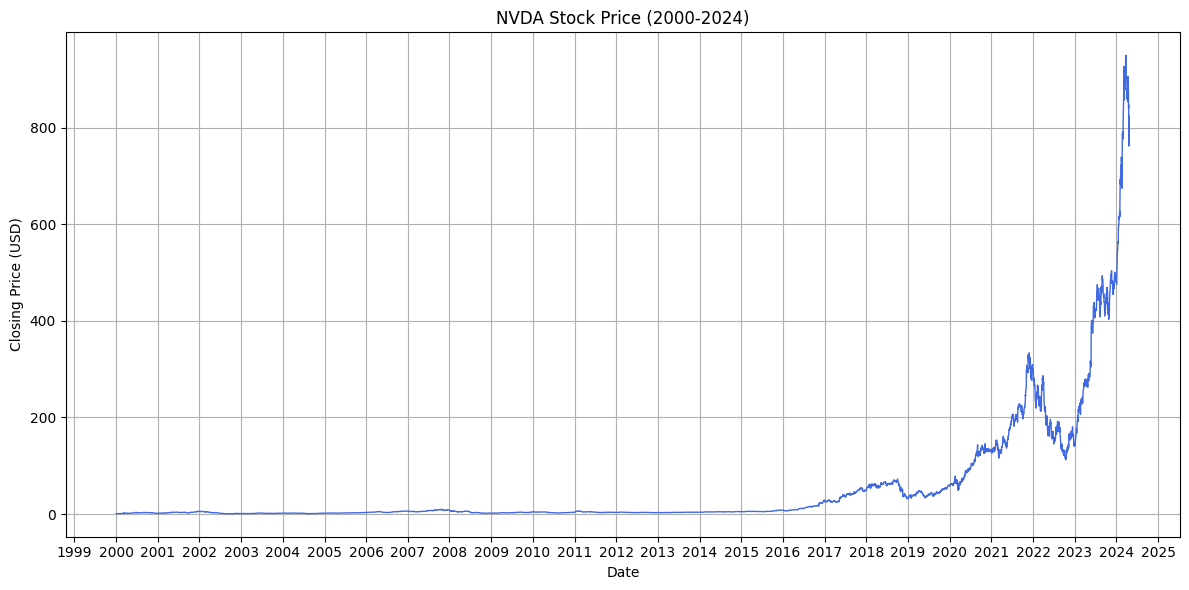

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Ensure datetime format
nvda["Date"] = pd.to_datetime(nvda["Date"])

# Filter for post-1984
nvda_post1984 = nvda[nvda["Date"] >= "2000-01-01"].sort_values("Date")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(nvda_post1984["Date"], nvda_post1984["Close"], color='royalblue', linewidth=1)
plt.title("NVDA Stock Price (2000-2024)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")

# Format x-axis to show yearly ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.grid(True)
plt.tight_layout()
plt.show()

^ The above chart shows the explosion of NVDA stock price in the last few years. This is important because their GPUs are used in the creation of animated movies. The better GPUs we have access to, the more computing power we have, which can lead to higher quality animation capabilities. 

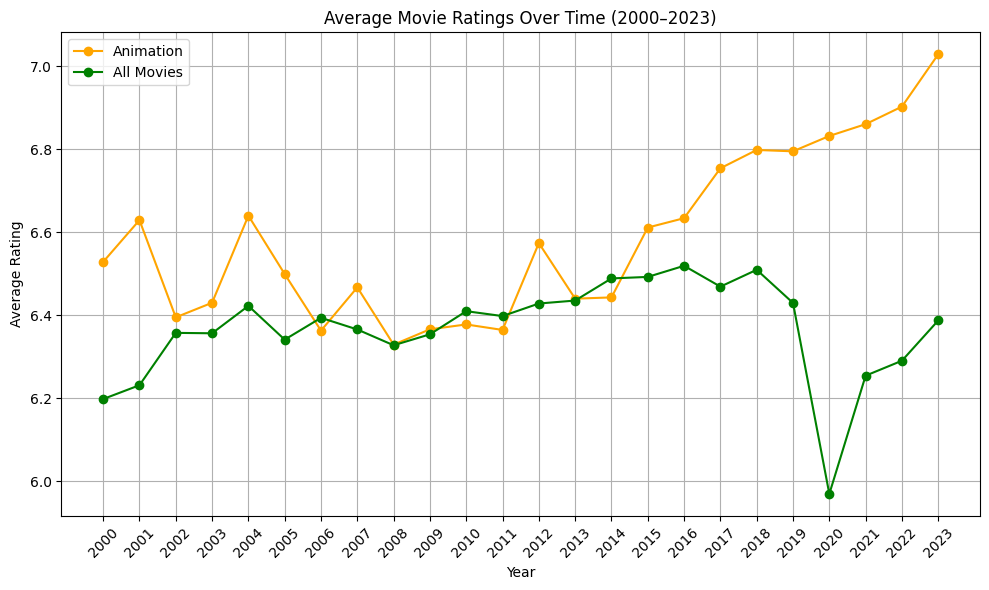

In [45]:
import matplotlib.pyplot as plt

# --- Define Animation Movie Rating Averages by Year ---
ani_movies["release_date"] = pd.to_datetime(ani_movies["release_date"], errors='coerce')
anim_avg = (
    ani_movies[
        (ani_movies["release_date"].dt.year >= 2000) &
        (ani_movies["release_date"].dt.year != 2024) &
        (ani_movies["vote_average"] > 0)
    ]
    .groupby(ani_movies["release_date"].dt.year)["vote_average"]
    .mean()
)

# --- Define All Movie Rating Averages by Year ---
all_avg = (
    movies_30k[
        (movies_30k["Year"] >= 2000) &
        (movies_30k["Year"] != 2024) &
        (movies_30k["Rating"] > 0)
    ]
    .groupby("Year")["Rating"]
    .mean()
)

# --- Plot Both ---
plt.figure(figsize=(10, 6))
plt.plot(anim_avg.index, anim_avg.values, marker='o', label="Animation", color='orange')
plt.plot(all_avg.index, all_avg.values, marker='o', label="All Movies", color='green')
plt.title("Average Movie Ratings Over Time (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.legend()
plt.grid(True)
plt.xticks(anim_avg.index.union(all_avg.index), rotation=45)
plt.tight_layout()
plt.show()

^ Here we see that animated movies tend to score higher ratings among viewers than live action films do.

In [67]:
import re

def duration_to_minutes(text):
    if not isinstance(text, str):
        return None
    text = text.lower().strip()

    h_match = re.search(r"(\d+)\s*h", text)
    m_match = re.search(r"(\d+)\s*m", text)

    hours = int(h_match.group(1)) if h_match else 0
    minutes = int(m_match.group(1)) if m_match else 0

    return hours * 60 + minutes if (hours or minutes) else None

# Apply to the dataset
movies_30k["duration_mins"] = movies_30k["Duration"].apply(duration_to_minutes)

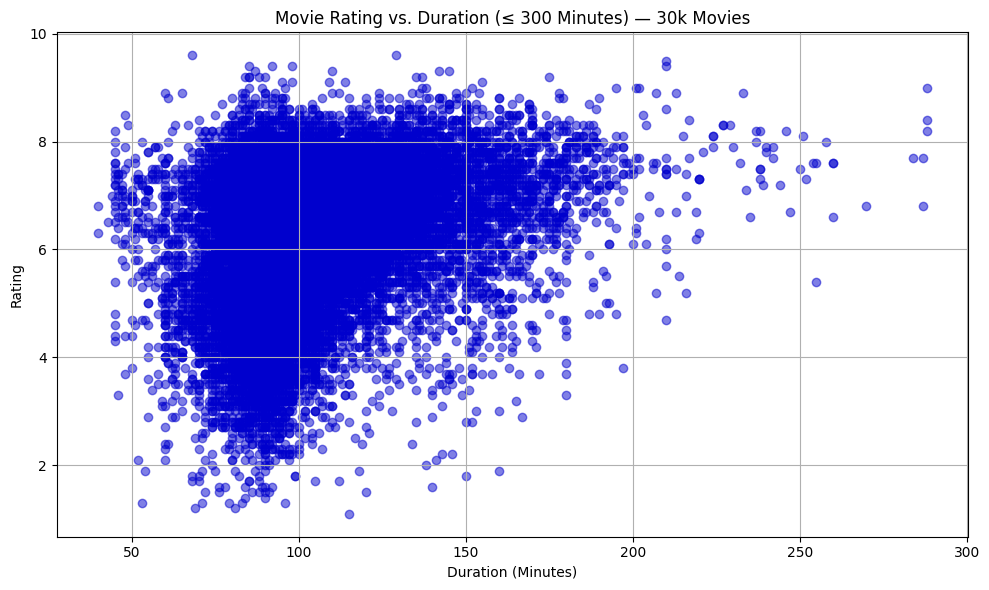

In [69]:
# Filter for valid values with duration ≤ 300
valid = movies_30k[
    (movies_30k["duration_mins"].notnull()) &
    (movies_30k["Rating"].notnull()) &
    (movies_30k["duration_mins"] <= 300)
]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(valid["duration_mins"], valid["Rating"], alpha=0.5, color='mediumblue')
plt.title("Movie Rating vs. Duration (≤ 300 Minutes) — 30k Movies")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

^ Above we see that, in general, longer movies tend to end up with higher ratings amongst viewers.

We have now looked at some preliminary analysis with my 3 data sets. We see trends starting to form such as the relation between movie duration and rating, or the fact the animated movies tend to score higher than live-action movies. We have determined that these data sets are indeed useful and can provide much insight into the world of VFX, animation, and film. There are certain gaps in the data (such as many movies not having a rating or having 0 as a placeholder), but we simply remove these outliers in our analysis so that our charts are clean and concise. There were no duplicated in the data sets.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

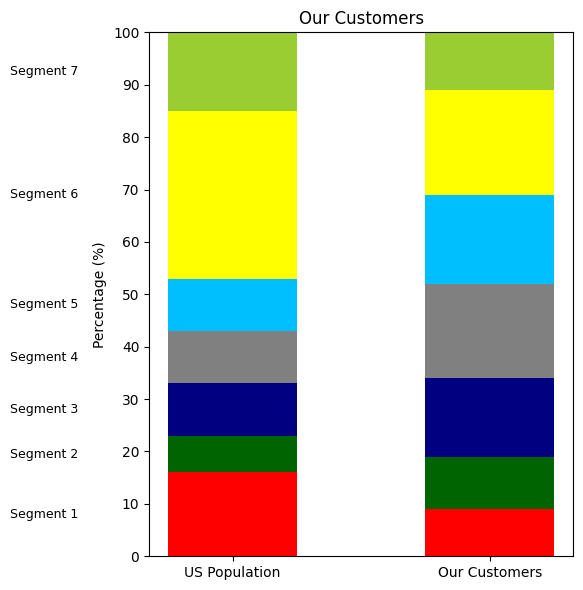

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Segment labels and values
segments = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4',
            'Segment 5', 'Segment 6', 'Segment 7']
us_pop =     [16, 7, 10, 10, 10, 32, 15]
customers =  [9, 10, 15, 18, 17, 20, 11]

# Convert to numpy for stacking
us_pop = np.array(us_pop)
customers = np.array(customers)

# Colors for each segment (approximated from image)
colors = ['red', 'darkgreen', 'navy', 'gray', 'deepskyblue', 'yellow', 'yellowgreen']

# Bar positions
x = np.arange(2)
width = 0.5

# Initialize plot
fig, ax = plt.subplots(figsize=(6, 6))
bottom_us = 0
bottom_cust = 0

# Draw stacked bars
for i in range(len(segments)):
    ax.bar(0, us_pop[i], width, bottom=bottom_us, color=colors[i])
    ax.bar(1, customers[i], width, bottom=bottom_cust, color=colors[i])
    bottom_us += us_pop[i]
    bottom_cust += customers[i]

# Set labels and title
ax.set_xticks(x)
ax.set_xticklabels(['US Population', 'Our Customers'])
ax.set_title('Our Customers')
ax.set_ylabel('Percentage (%)')
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 101, 10))  # y-axis ticks every 10%

# Add segment labels to left of bars
for i in range(len(segments)):
    y = sum(us_pop[:i]) + us_pop[i] / 2
    ax.text(-0.6, y, segments[i], va='center', ha='right', fontsize=9)

plt.tight_layout()
plt.show()